# Pre-processing

In [ ]:
from forex_python.converter import CurrencyRates
import matplotlib.pyplot as plt
from kiva_data import KivaData
import requests
from fixer_config import access_key
import json

In [ ]:
from kiva_data import KivaData
from forex_python.converter import CurrencyRates
from functools import partial
import seaborn as sns

In [ ]:
kiva_data = KivaData(use_sample=True)

df = kiva_data.loan_data
rate_converter = CurrencyRates()

currencies = df['currency'].unique()
currencies

In [ ]:
df.columns

In [ ]:
df.loc[:, 'year_month'] = df['date'].apply(lambda x: x.date().strftime('%Y-%m'))
ts_df = df.groupby(['year_month', 'sector'])['funded_amount'].count().reset_index()


plt.figure(figsize=(20,10))
sns.pointplot(
    x='year_month',
    y='funded_amount',
    hue='sector',
    alpha=0.8,
    linestyle='-',
    data=ts_df)
plt.show()

In [ ]:
%run histgram.py

In [ ]:
figure, ax = plt.subplots(figsize=(10,6))
sns.distplot(
    df.funded_amount,
    ax=ax
)
plt.show()

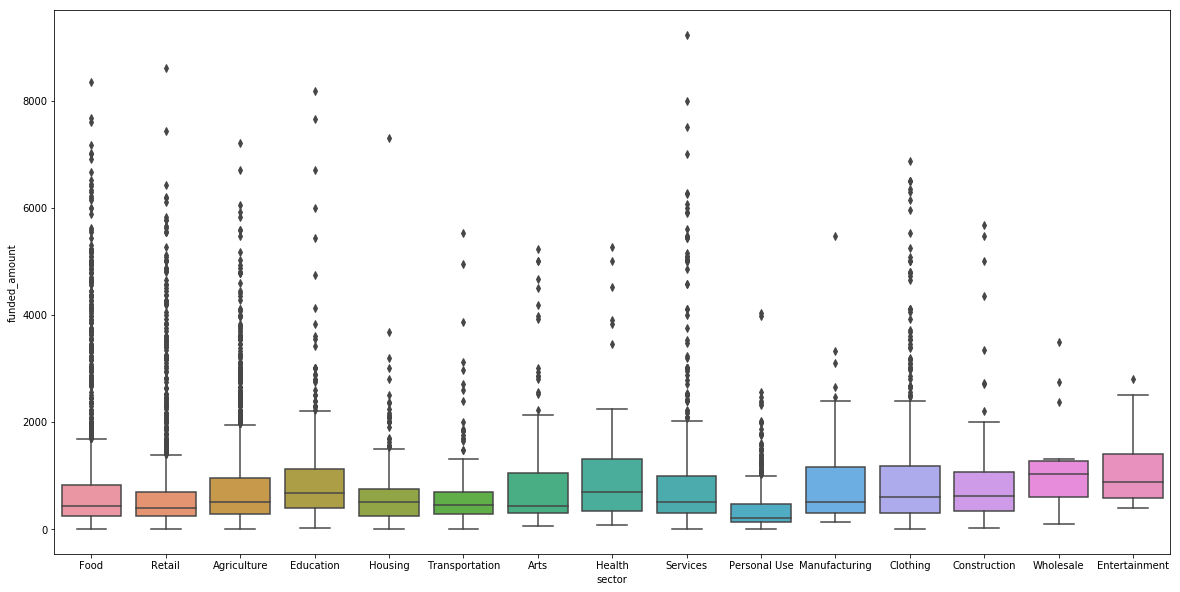

In [65]:
figure, ax = plt.subplots(figsize=(20,10))

sns.boxplot(
    x='sector', 
    y='funded_amount',
    #orient="h",
    data=df[df['funded_amount'] < 10000])
plt.show()

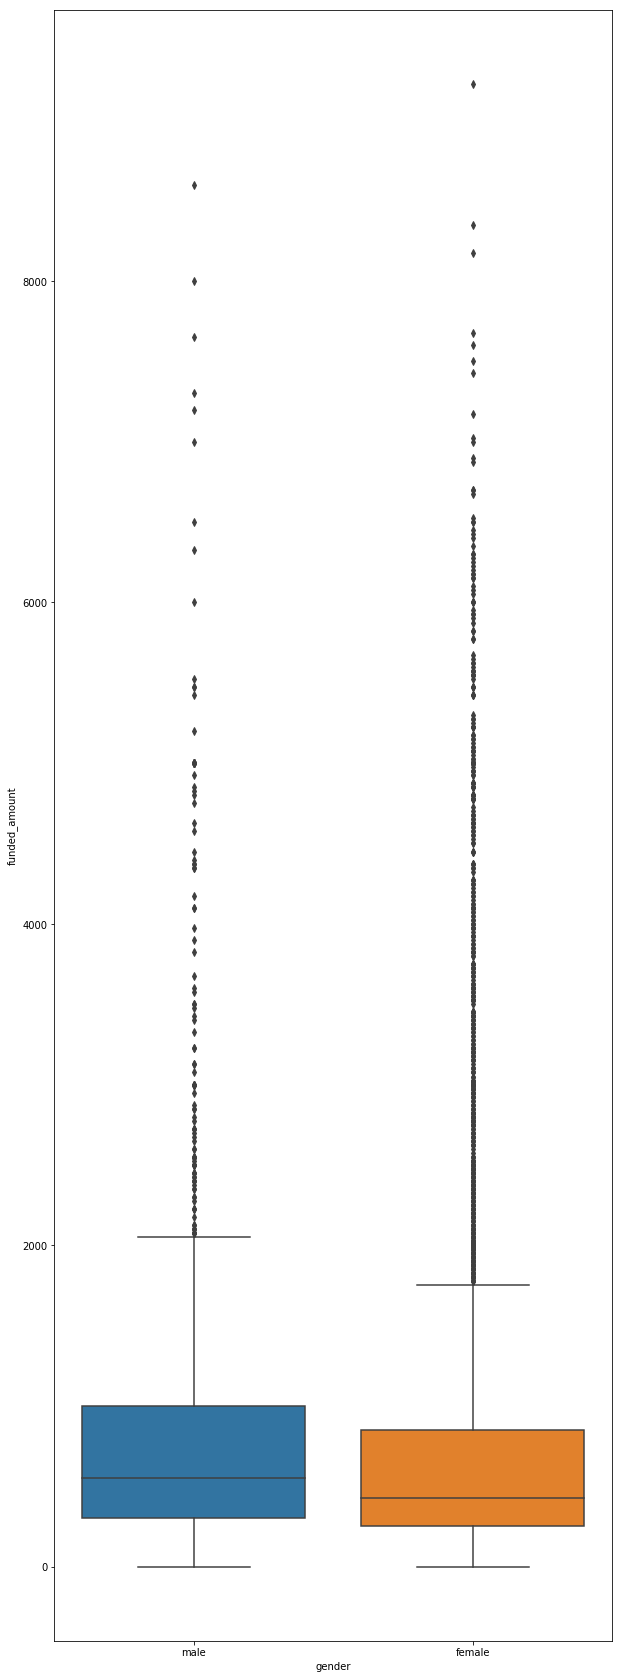

In [66]:
figure, ax = plt.subplots(figsize=(10,30))

sns.boxplot(
    x='gender', 
    y='funded_amount', 
    data=df[df['funded_amount'] < 10000])
plt.show()

In [ ]:
df.country_code.unique()

In [ ]:
kiva_data.wb_data

In [ ]:
rate=0
for currency in currencies:
    try: 
        rate = rate_converter.get_rate(currency, 'USD')
    except:
        print( f"not available {currency}")
    #print(f'{currency}: {rate}')

In [ ]:
df.columns

In [ ]:
dt = df['date'][0]

In [ ]:
lambda x: x.date().strftime('%Y-%m')

In [ ]:
''

In [ ]:
len(df['borrower_genders'].unique())

In [ ]:
import matplotlib.pyplot as plt
df.groupby('gender').agg('count')[['loan_amount']].plot.pie(y='loan_amount')
plt.show()

In [ ]:
df.repayment_interval.unique()

In [ ]:
df.describe()

In [ ]:
df.columns

In [ ]:
df[['activity', 'sector', 'use', 'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time','tags', 'borrower_genders', 'repayment_interval',
       'date', 'gender']].agg(['min', 'max', 'count', lambda x: len(x.unique())])

In [ ]:
df.gender.value_counts()

In [ ]:
df.country.unique()

In [ ]:
df.country.value_counts()